# Exercice 8 - TD1
## Etude de la talle d'un groupe d'étudiants


1- Data Collection

In [1]:
classes = [(150,160), (160, 165), (165, 170), (170, 175), (175, 180), (180, 190)]
effectifs = [4, 8, 15, 20, 10, 3]

data = {classes[i]: effectifs[i] for i in range(len(classes))}
    
print(data)

{(150, 160): 4, (160, 165): 8, (165, 170): 15, (170, 175): 20, (175, 180): 10, (180, 190): 3}


In [2]:
# Calcul des centres de classes
centres = [(a + b)/2 for (a, b) in classes]

# Calcul des fréquences
total_effectifs = sum(effectifs)
frequences = [round(eff/total_effectifs, 4) for eff in effectifs]

# Ajout des centres et fréquences au dictionnaire
for i in range(len(classes)):
    data[classes[i]] = {
        'effectif': effectifs[i],
        'centre': centres[i],
        'frequence': frequences[i]
    }

print("Données complètes avec centres et fréquences:")
for c in data:
    print(f"{c}: {data[c]}")


Données complètes avec centres et fréquences:
(150, 160): {'effectif': 4, 'centre': 155.0, 'frequence': 0.0667}
(160, 165): {'effectif': 8, 'centre': 162.5, 'frequence': 0.1333}
(165, 170): {'effectif': 15, 'centre': 167.5, 'frequence': 0.25}
(170, 175): {'effectif': 20, 'centre': 172.5, 'frequence': 0.3333}
(175, 180): {'effectif': 10, 'centre': 177.5, 'frequence': 0.1667}
(180, 190): {'effectif': 3, 'centre': 185.0, 'frequence': 0.05}


In [3]:
import matplotlib.pyplot as plt

2- Diagramme à barres

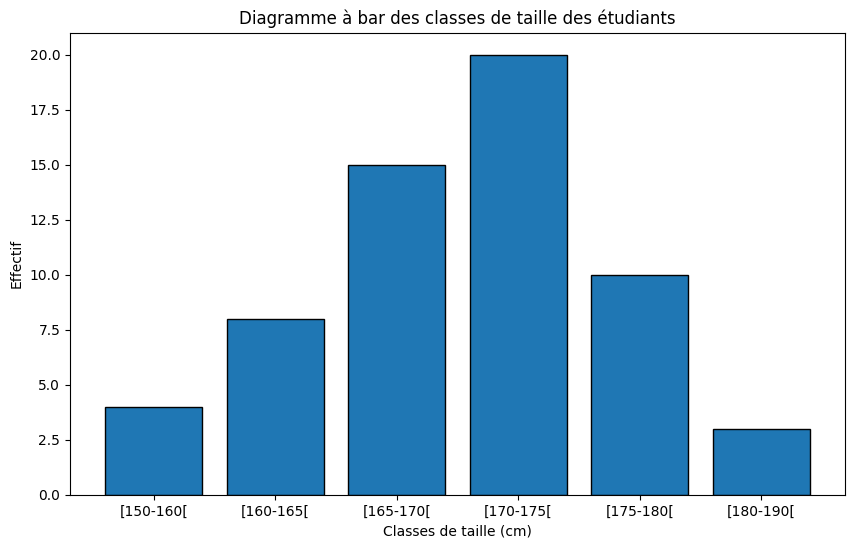

In [4]:
# Extract data for plotting
class_labels = [f"[{c[0]}-{c[1]}[" for c in classes]
heights = effectifs

# Create bar diagram
plt.figure(figsize=(10, 6))
plt.bar(class_labels, heights, width=0.8, edgecolor='black')

# Add labels and title
plt.xlabel('Classes de taille (cm)')
plt.ylabel('Effectif')
plt.title('Diagramme à bar des classes de taille des étudiants')

# Show plot
plt.show()


3- Fonction de répartition

In [5]:
# Calcul des fréquences cumulées
freq_cum = []
cumul = 0
for i in range(len(classes)):
    cumul += data[classes[i]]['effectif'] / total_effectifs
    freq_cum.append(cumul)

print("Fréquences cumulées:")
for i, classe in enumerate(classes):
    print(f"Classe {classe}: fréquence cumulée = {freq_cum[i]:.4f}")


# Calcul de F(x) pour les centres de classes
print("Valeurs de F(x) aux centres des classes:")
for i, classe in enumerate(classes):
    a, b = classe
    x_centre = data[classe]['centre']
    freq_classe = data[classe]['frequence']

    # Calcul de F(x_centre)
    if x_centre < classes[0][0]:
        F_centre = 0.0
    elif x_centre >= classes[-1][1]:
        F_centre = 1.0
    else:
        F_prev = 0 if i == 0 else freq_cum[i - 1]
        d = freq_classe * (x_centre - a) / (b - a)
        F_centre = F_prev + d

    print(f"F({x_centre}) = {F_centre:.4f}")



Fréquences cumulées:
Classe (150, 160): fréquence cumulée = 0.0667
Classe (160, 165): fréquence cumulée = 0.2000
Classe (165, 170): fréquence cumulée = 0.4500
Classe (170, 175): fréquence cumulée = 0.7833
Classe (175, 180): fréquence cumulée = 0.9500
Classe (180, 190): fréquence cumulée = 1.0000
Valeurs de F(x) aux centres des classes:
F(155.0) = 0.0333
F(162.5) = 0.1333
F(167.5) = 0.3250
F(172.5) = 0.6167
F(177.5) = 0.8667
F(185.0) = 0.9750


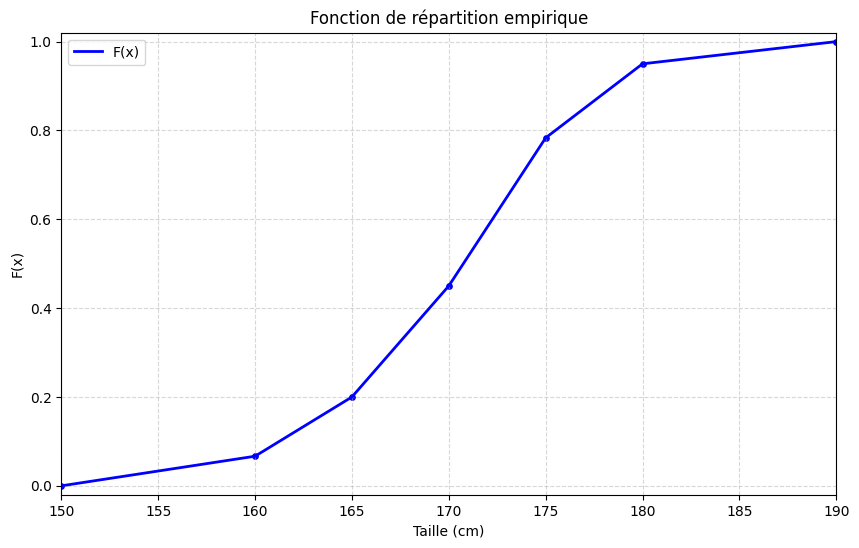

In [7]:

# Fonction de répartition
bornes = [classe[0] for classe in classes] + [classes[-1][1]]
freq_cumulee = [0] + list(freq_cum)

plt.figure(figsize=(10, 6))
plt.plot(bornes, freq_cumulee, color='b', linewidth=2, label="F(x)")

# Ajout des points aux bornes de chaque classe
plt.scatter(bornes, freq_cumulee, color='b', zorder=1, s=15)

plt.xlabel('Taille (cm)')
plt.ylabel('F(x)')
plt.title('Fonction de répartition empirique')
plt.ylim(-0.02, 1.02)
plt.xlim(min(bornes), max(bornes))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()


3- Taille moyenne et écart-type

In [8]:
# Taille moyenne et écart-type

# Calcul de la taille moyenne (approximation avec les centres)
taille_moyenne = sum(centre * effectif for centre, effectif in zip(centres, effectifs)) / total_effectifs

# Calcul de l'écart-type
variance = sum(effectif * (centre - taille_moyenne)**2 for centre, effectif in zip(centres, effectifs)) / total_effectifs
ecart_type = variance**0.5

print(f"Taille moyenne: {taille_moyenne:.2f} cm")
print(f"Écart-type: {ecart_type:.2f} cm")


Taille moyenne: 170.21 cm
Écart-type: 6.84 cm


4- Proportion d'enfants ayant un taille comprise entre (mean - 2 ecart ) et (mean + 2 ecart)

In [9]:
z = 0
for i in range(len(effectifs)):
    if (centres[i] >= (taille_moyenne - 2 * ecart_type)) and (centres[i] <= (taille_moyenne + 2 * ecart_type)):
        z += effectifs[i]
proportion = z / total_effectifs
print(f"[moyenne - 2σ, moyenne + 2σ]: [{taille_moyenne - 2 * ecart_type}, {taille_moyenne + 2 * ecart_type}]")
print(f"Proportion d'enfants dans l'intervalle [moyenne - 2σ, moyenne + 2σ]: {proportion:.2%}")



[moyenne - 2σ, moyenne + 2σ]: [156.53684028311304, 183.87982638355365]
Proportion d'enfants dans l'intervalle [moyenne - 2σ, moyenne + 2σ]: 88.33%
